## Отчет по лабораторной работе № 7 по теме: "Распознавание рукописных цифр"
    Цель: решение задачи классификации рукописных цифр с помощью многослойного перцептрона.
    Исходные данные: DataSet MNIST, состоящий из 60000 черно-белых изображений с цифрами(от 0 до 9).
        
```python        
fig = plt.figure(figsize=(15,4))

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,10,num)
    ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()
```

![Initial data](id2.jpg)

### Преобразование данных
```python  
(x_train,y_train),(x_test,y_test)=mnist.load_data()
```

In [163]:
x_train.shape

(60000, 28, 28)

In [162]:
y_train.shape

(60000,)


```python
x_train = x_train.reshape(x_train.shape[0],784)
x_train = x_train.astype('float32')
x_train /= 255.0
y_train = utils.to_categorical(y_train, 10)

x_test = x_test.reshape(x_test.shape[0],784)
x_test = x_test.astype('float32')
x_test /= 255.0
y_test = utils.to_categorical(y_test, 10)
```

In [165]:
y_train.shape

(60000, 10)

In [166]:
x_train.shape

(60000, 784)

### Перцепрон
```python
model=models.Sequential()
model.add(layers.Dense(784,input_shape=(784,),activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
```

![Arch](model.jpg)

### Обучение перцептрона

![Arch](acc.jpg)
![Arch](loss.jpg)

### Тестирование модели

```python
fig = plt.figure(figsize=(15,4))

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,10,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    x1 = x_test[i].reshape(1,784)
    
    y1 = model.predict(x1)
    yo = model.predict_classes(x1)
    plt.xlabel(yo[0], fontsize = 28)
    
    plt.xticks([])
    plt.yticks([])
    
plt.show()
```

![Arch](prd2.jpg)

## Вывод:
    Перцептрон показал высокую точность. Вряд ли можно улучшить результат.
## Список литературы:
* The Sequential model: [https://keras.io/guides/sequential_model/](https://keras.io/guides/sequential_model/)
* Глубокое обучение для новичков: распознаем рукописные цифры: [https://habr.com/ru/company/wunderfund/blog/314242/](https://habr.com/ru/company/wunderfund/blog/314242/)

In [1]:
!nvidia-smi

Sat Dec  4 17:11:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   44C    P0    91W / 300W |  32349MiB / 32510MiB |     30%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   35C    P0    57W / 300W |    464MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
#Резервирование видеокарты
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2' 

In [161]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import glob
import random
from PIL import Image

(x_train,y_train),(x_test,y_test)=mnist.load_data()

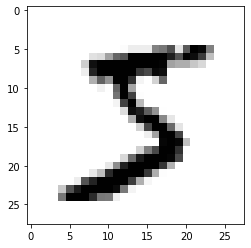

In [148]:
plt.imshow(x_train[0], cmap = 'binary', interpolation = 'nearest')

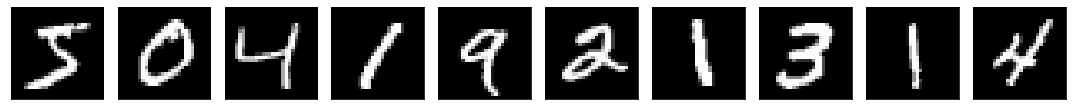

In [149]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,10,num)
    ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

##### Обучение нейросети на тренировочных данных из MNIST.

In [164]:
x_train = x_train.reshape(x_train.shape[0],784)
x_train = x_train.astype('float32')
x_train /= 255.0
y_train = utils.to_categorical(y_train, 10)

x_test = x_test.reshape(x_test.shape[0],784)
x_test = x_test.astype('float32')
x_test /= 255.0
y_test = utils.to_categorical(y_test, 10)

In [131]:
model=models.Sequential()
model.add(layers.Dense(784,input_shape=(784,),activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [132]:
# Арихитектура нейронной сети
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


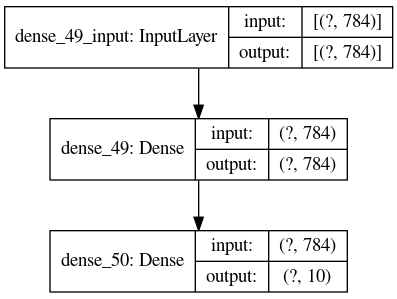

In [133]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

plot_model(model, show_shapes=True)

#plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)
#plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [71]:
history = model.fit(x_train, y_train,batch_size=128, epochs=30,validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9295 - val_loss: 0.1212 - val_accuracy: 0.9636
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9716 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0736 - val_accuracy: 0.9761
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0419 - accuracy: 0.9877 - val_loss: 0.0648 - val_accuracy: 0.9786
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.0793 - val_accuracy: 0.9745
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.9934 - val_loss: 0.0624 - val_accuracy: 0.9814
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 

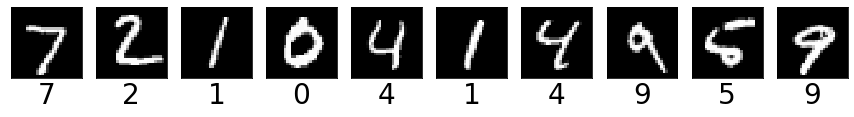

In [120]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,10,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    x1 = x_test[i].reshape(1,28*28)
    
    y1 = model.predict(x1)
    yo = model.predict_classes(x1)
    plt.xlabel(yo[0], fontsize = 28)
    
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [111]:
for i in range(10):
    x1 = x_test[i].reshape(1,28*28)
    y1 = model.predict(x1)
    yo = model.predict_classes(x1)
    print(yo)

[7]
[2]
[1]
[0]
[4]
[1]
[4]
[9]
[5]
[9]


##### Полученные графики точности и потерь.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


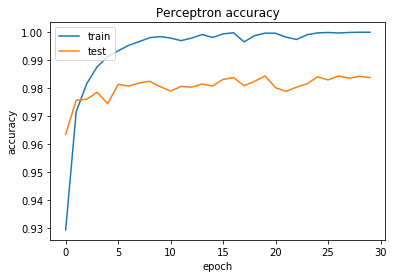

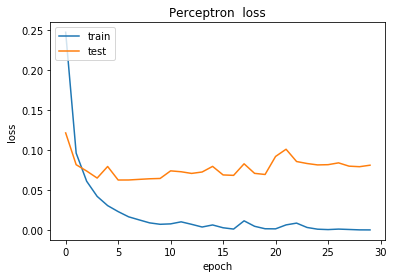

In [122]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Perceptron accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perceptron  loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
print(history.history)

{'loss': [1.8262230157852173, 1.18706214427948, 0.8375415205955505, 0.6484990119934082, 0.5431463718414307, 0.47873562574386597, 0.42592206597328186, 0.3734135925769806, 0.3284459114074707, 0.2974799871444702, 0.2755543291568756, 0.25916793942451477, 0.2460382878780365, 0.23607981204986572, 0.22855067253112793, 0.22127778828144073, 0.2145891934633255, 0.20963363349437714, 0.20421816408634186, 0.19977006316184998, 0.1950213611125946, 0.19187726080417633, 0.1879294216632843, 0.1845497041940689, 0.18174606561660767, 0.17878925800323486, 0.1763472557067871, 0.17376264929771423, 0.1717027872800827, 0.16978834569454193], 'accuracy': [0.7390499711036682, 0.8292666673660278, 0.856333315372467, 0.8630666732788086, 0.8672333359718323, 0.8728333115577698, 0.895633339881897, 0.9235333204269409, 0.9299333095550537, 0.9342833161354065, 0.9369833469390869, 0.9390166401863098, 0.9410333037376404, 0.9426666498184204, 0.9444000124931335, 0.9465000033378601, 0.9478999972343445, 0.9485166668891907, 0.9488

In [22]:
print(history.params)

{'verbose': 1, 'epochs': 30, 'steps': 469}
